**list of libraries**

* OpenCV3
* moviepy
* IPython
* copy

# Introduction to Computer Vision

## What is Computer Vision

* Humans use their eyes and their brains to see and visually sense the world around them.
* Computer vision is the science that aims to give a similar, if not better, capability to a machine or computer.
* Computer vision is concerned with the automatic extraction, analysis and understanding of useful information from a single image or a sequence of images. It involves the development of a theoretical and algorithmic basis to achieve automatic visual understanding.

(Source: The British Machine Vision Association and Society for Pattern Recognition)

## Common Tasks in Computer Vision

* augmented reality
* autonomous vehicles
* optical character recognition
* face recognition
* gesture analysis
* image restoration
* medical image analysis
* security and surveillance

## What is Image/Video Processing

* Image/Video processing is processing of images using mathematical operations where the input is an image, a series of images, or a video, such as a photograph or video frame
* The output of image processing may be either an image or a set of characteristics or parameters related to the image.

## Tools of the trade: OpenCV


OpenCV is one of the most popular packages in Python for carrying out computer vision related tasks, and that's what we'll be using in the following sections.

[OpenCV](http://opencv.org/) (Open Source Computer Vision) is a library of programming functions mainly aimed at **real-time** computer vision.

* The library is cross-platform
* Free for both academic and commercial use
* It has C++, C, Python and Java interfaces and supports Windows, Linux, Mac OS, iOS and Android


## Notes on using OpenCV

Note: A lot of things changed between OpenCV2 and OpenCV3. Here is a summary of those changes - http://docs.opencv.org/master/db/dfa/tutorial_transition_guide.html. We'll be using Opencv 3.x here.

---

# Jumping in at the deep end: Face Detection

## What we'll learn?

* How to import images to NumPy arrays using OpenCV
* How to plot NumPy arrays (of correct shape) as image
* How to manipulate the colorspace of an image to make sure that it gets rendered correctly
* How to detect a human face in an image
* How to detect and track a human face in a video

`DEMO 4.1`

In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
from pprint import pprint
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.2.0 


## Importing Images

Let's now import an image.

It's common for a lot of algorithms implemented in OpenCV to act on a black and white version of the image, so we'll also transform the image to B&W. Here is the image we are going to import:

![](./images/face01.jpg)

`DEMO 4.2`

In [2]:
# load our image and convert it to grayscale
image = cv2.imread("./images/face01.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## Images as Data Structures

Let's now see what the imported image looks like:

In [3]:
`DEMO 4.3`

SyntaxError: invalid syntax (<ipython-input-3-d23665a8923a>, line 1)

In [4]:
print("\nData Type:"); pprint(type(image))
print("\nExample:\n pixel at (0,0) [B,G,R]:\t[%i,%i,%i]" % tuple(image[0,0,:]))
print("\ndata-type:\n %s " % image.dtype)
print("\nImage shape: "); print("Height:\t\t%i pixels\nWidth:\t\t%i pixels\nChannels:\t%i" % image.shape)
print("\nThe image array:"); pprint(image)


Data Type:
<class 'numpy.ndarray'>

Example:
 pixel at (0,0) [B,G,R]:	[210,208,208]

data-type:
 uint8 

Image shape: 
Height:		250 pixels
Width:		250 pixels
Channels:	3

The image array:
array([[[210, 208, 208],
        [210, 208, 208],
        [210, 208, 208],
        ..., 
        [206, 206, 206],
        [204, 204, 204],
        [204, 204, 204]],

       [[210, 208, 208],
        [210, 208, 208],
        [210, 208, 208],
        ..., 
        [206, 206, 206],
        [204, 204, 204],
        [204, 204, 204]],

       [[210, 208, 208],
        [210, 208, 208],
        [210, 208, 208],
        ..., 
        [206, 206, 206],
        [204, 204, 204],
        [204, 204, 204]],

       ..., 
       [[180, 178, 177],
        [180, 178, 177],
        [180, 178, 177],
        ..., 
        [115, 120, 123],
        [115, 120, 123],
        [115, 120, 123]],

       [[178, 176, 175],
        [178, 176, 175],
        [178, 176, 175],
        ..., 
        [113, 118, 121],
        [113, 118, 1

## Plotting Images

Before we move further, let's make sure that we can again transform this matrix into an image and print it. OpenCV's own function doesn't play very nice with other IDEs (for example Commit.Live or Jupyter notebooks, so we are going to use matplotlib to plot these images.

`DEMO 4.4`

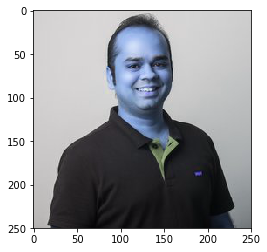

In [5]:
plt.imshow(image)
plt.show()

## Fix the plot: by manipulating the colorspace

The colors are off!

* The image has been correctly loaded by openCV as a numpy array, but the color of each pixel has been sorted as BGR.
* Matplotlib's plot expects an RGB image.
* So, for a correct display of the image, it is necessary to swap those channels.

`cvtColor` is the openCV function which changes the color space of an image. It takes as input an image and a numerical flag which represents the conversion function. Let's list some of that.

`DEMO 4.5`

In [6]:
BGRflags = [flag for flag in dir(cv2) if flag.startswith('COLOR_BGR') ]
pprint(BGRflags)

['COLOR_BGR2BGR555',
 'COLOR_BGR2BGR565',
 'COLOR_BGR2BGRA',
 'COLOR_BGR2GRAY',
 'COLOR_BGR2HLS',
 'COLOR_BGR2HLS_FULL',
 'COLOR_BGR2HSV',
 'COLOR_BGR2HSV_FULL',
 'COLOR_BGR2LAB',
 'COLOR_BGR2LUV',
 'COLOR_BGR2Lab',
 'COLOR_BGR2Luv',
 'COLOR_BGR2RGB',
 'COLOR_BGR2RGBA',
 'COLOR_BGR2XYZ',
 'COLOR_BGR2YCR_CB',
 'COLOR_BGR2YCrCb',
 'COLOR_BGR2YUV',
 'COLOR_BGR2YUV_I420',
 'COLOR_BGR2YUV_IYUV',
 'COLOR_BGR2YUV_YV12',
 'COLOR_BGR5552BGR',
 'COLOR_BGR5552BGRA',
 'COLOR_BGR5552GRAY',
 'COLOR_BGR5552RGB',
 'COLOR_BGR5552RGBA',
 'COLOR_BGR5652BGR',
 'COLOR_BGR5652BGRA',
 'COLOR_BGR5652GRAY',
 'COLOR_BGR5652RGB',
 'COLOR_BGR5652RGBA',
 'COLOR_BGRA2BGR',
 'COLOR_BGRA2BGR555',
 'COLOR_BGRA2BGR565',
 'COLOR_BGRA2GRAY',
 'COLOR_BGRA2RGB',
 'COLOR_BGRA2RGBA',
 'COLOR_BGRA2YUV_I420',
 'COLOR_BGRA2YUV_IYUV',
 'COLOR_BGRA2YUV_YV12']


In this case it's necessary to change the image space from BGR (Blue, Green, Red) to RGB, so the correct flag is `cv2.COLOR_BGR2RGB`

`DEMO 4.6`

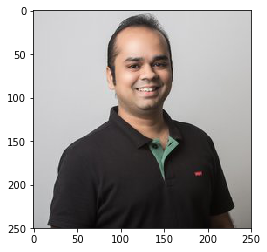

In [7]:
cv_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(cv_rgb)
plt.show()

## A function to plot images

Let's wrap everything inside a function so that we can easily use it later on.

`DEMO 4.7`

In [8]:
def plotBGR2RGB(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()

## Detecting a face

* Usual Challenges
    - lighting
    - image size
    
* Face detection vs face recognition
    - Face detection: Identifying if an image contains a face
    - Face recognition: Assigning a name to a face

## How to Detect a face using OpenCV

OpenCV is very powerful and can make it very easy to perform complicated but common tasks in Computer Vision, like human face detection, for example. Let's see that in action.

We'll be using Haar Cascades for Face detection. It's one of the most popular approaches and is very well supported by OpenCV.

## Haar Cascades

* [The Viola–Jones object detection framework](https://en.wikipedia.org/wiki/Viola%E2%80%93Jones_object_detection_framework) was the first object detection framework to provide competitive object detection rates in real-time.
* Proposed in 2001 by Paul Viola and Michael Jones.
* It can be trained to detect a variety of object classes.
* It was motivated primarily by the problem of face detection.
* Scale and location invariant 

We'll not go into the details right now, and use it as a blackbox algorithm. You can read [this interesting interview](http://www.makematics.com/research/viola-jones/) for some more intuition.

## Haar Cascades in OpenCV

[Here is the OpenCV page on Face Detection by Haar Cascades](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html)

How to:
* OpenCV comes with a function that can accept any haar cascade (stored in a file) and use it for object (like face) detection
* OpenCV comes with many such haar cascades by default, and we'll be using one of those

Note:
* Path to Haar Cascades (the files) may not be correctly detected if Python was installed through Anaconda
* Here is how to fix it: https://github.com/Hironsan/BossSensor/issues/9
    - You can imitate the path provided above to locate the correct xml file in your installation

## Detecting Faces

`DEMO 4.8`

In [9]:
# load the face detector and detect faces in the image
detector = cv2.CascadeClassifier("/Users/soumendra/anaconda3/pkgs/opencv3-3.1.0-py35_0/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml")
rects = detector.detectMultiScale(gray, scaleFactor=1.05, 
                                  minNeighbors=7, minSize=(30, 30),
                                  flags=cv2.CASCADE_SCALE_IMAGE)

error: C:\bld\opencv_1498168473487\work\opencv-3.2.0\modules\objdetect\src\cascadedetect.cpp:1681: error: (-215) !empty() in function cv::CascadeClassifier::detectMultiScale


## Marking faces (with rectangles)

We'll now loop over the detected rectangles (if any) which identify the faces in the image.

`DEMO 4.9`

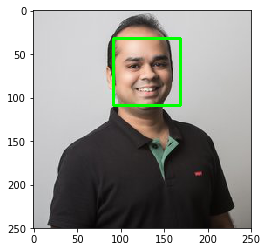

In [9]:
# loop over the faces and draw a rectangle surrounding each
for (x, y, w, h) in rects:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

## Putting it all together

**Create functions to wrap it all in**



`DEMO 4.10`

In [10]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
from pprint import pprint
print("OpenCV Version : %s " % cv2.__version__)
from copy import deepcopy

def plotBGR2RGB(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()
    return(1)

# Given an image matrix, detects a face, draws a rectangle around it, and returns it
def face_detector(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    detector = cv2.CascadeClassifier("/Users/soumendra/anaconda3/pkgs/opencv3-3.1.0-py35_0/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml")
    rects = detector.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=7, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
    
    for (x, y, w, h) in rects:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    return(image)

# Given path to an image, executes the face detection pipeline and plots resulting images
def face_plot(imgpath):
    image_p = cv2.imread(imgpath)
    image_f = deepcopy(image_p)
    image_f = face_detector(image_f)
    res = np.hstack((image_p, image_f))
    plt.figure(figsize=(20,10))
    plotBGR2RGB(res)

## Trying it on small images

Let's put it all together for another image and see how the algorithm performs for an image of small size. (The last image was of size 250x250, but it had only one large face to be detected. Let's try an image of similar size but with many faces.)

`DEMO 4.11`

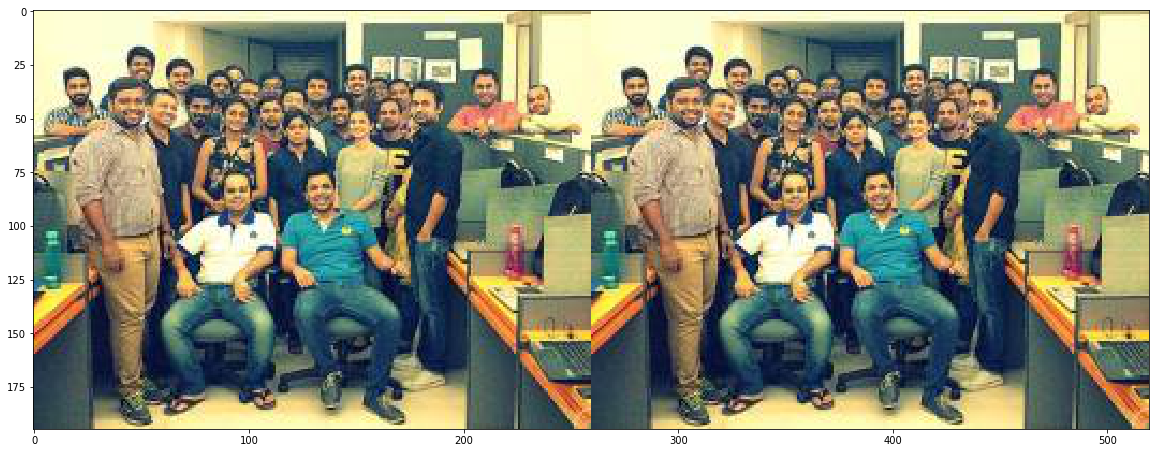

In [11]:
face_plot("./images/face02.jpg")

## Trying it under difficult lighting conditions

It looks like the algorithm didn't perform very well on a small image (260x195). The next image is larger (710x800) and has varying light conditions.

`DEMO 4.12`

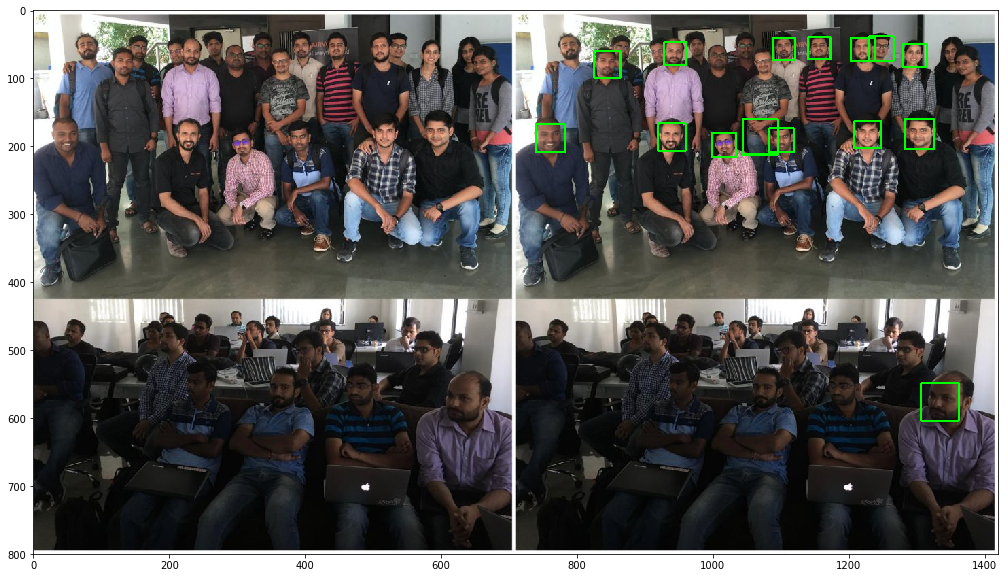

In [12]:
face_plot("./images/face03.jpeg")

In [13]:
def face_detector2(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    
    detector = cv2.CascadeClassifier("/Users/soumendra/anaconda3/pkgs/opencv3-3.1.0-py35_0/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml")
    rects = detector.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=7, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
    
    for (x, y, w, h) in rects:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    return(image)

def face_plot2(imgpath):
    image_p = cv2.imread(imgpath)
    image_f = deepcopy(image_p)
    image_f = face_detector2(image_f)
    res = np.hstack((image_p, image_f))
    plt.figure(figsize=(20,10))
    plotBGR2RGB(res)

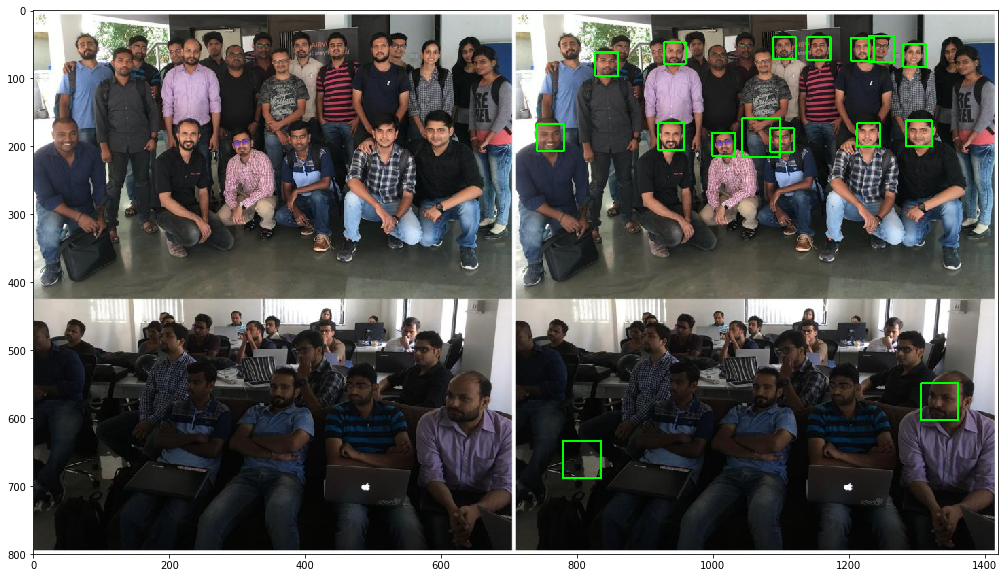

In [14]:
face_plot2("./images/face03.jpeg")

# Face Detection and Tracking in Videos


## The Approach

E
T
M

## Putting it together




---

`DEMO 4.13`



In [16]:
import imageio
imageio.plugins.ffmpeg.download()

from moviepy.editor import VideoFileClip
from IPython.display import HTML



Imageio: 'ffmpeg.win32.exe' was not found on your computer; downloading it now.
Error while fetching file: <urlopen error _ssl.c:733: The handshake operation timed out>.
Error while fetching file: <urlopen error _ssl.c:733: The handshake operation timed out>.
Error while fetching file: <urlopen error _ssl.c:733: The handshake operation timed out>.
Error while fetching file: The read operation timed out.


OSError: Unable to download 'ffmpeg.win32.exe'. Perhaps there is a no internet connection? If there is, please report this problem.

In [16]:
clip1 = VideoFileClip("./images/mark.mp4")

# NOTE: The output you return should be a color image (3 channel) for processing video below
# you should return the final output (image where rectangles are drawn on faces)
white_clip = clip1.fl_image(face_detector)

%time white_clip.write_videofile('.images/mark_new.mp4', audio=False)

[MoviePy] >>>> Building video ./mark_new.mp4
[MoviePy] Writing video ./mark_new.mp4


100%|██████████| 4117/4117 [10:43<00:00,  7.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./mark_new.mp4 

CPU times: user 20min 45s, sys: 1min 40s, total: 22min 25s
Wall time: 10min 43s


In [18]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('./images/mark_new.mp4'))

# Image classification 

In image classification, we try to assign a class label to an image based on the prominent objects contained inside the image.

Example:
* Classifying images from a zoo according to the species
* Classifying images of hand-written digits to the correct digit

## What we'll be doing

Digits (MNIST) with Logistic Regression!

* Read images
* Visualise them
* Flatten the images
* Resample for machine learning
* Build Models
* Predict on new data
* Model assessment

## Get the Images

`DEMO 4.14`

In [18]:
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn import datasets, metrics
from sklearn.linear_model import LogisticRegression

digits = datasets.load_digits()

pprint(digits)

{'DESCR': 'Optical Recognition of Handwritten Digits Data Set\n'
          '===================================================\n'
          '\n'
          'Notes\n'
          '-----\n'
          'Data Set Characteristics:\n'
          '    :Number of Instances: 5620\n'
          '    :Number of Attributes: 64\n'
          '    :Attribute Information: 8x8 image of integer pixels in the '
          'range 0..16.\n'
          '    :Missing Attribute Values: None\n'
          "    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n"
          '    :Date: July; 1998\n'
          '\n'
          'This is a copy of the test set of the UCI ML hand-written digits '
          'datasets\n'
          'http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n'
          '\n'
          'The data set contains images of hand-written digits: 10 classes '
          'where\n'
          'each class refers to a digit.\n'
          '\n'
          'Preprocessing programs made availabl

## Visualize the Images

* The data that we are interested in is made of 8x8 images of digits.
* Let's have a look at the first 8 images, stored in the `images` attribute of the dataset.
* For these images, we know which digit they represent: it is given in the 'target' of the dataset.

`DEMO 4.15`

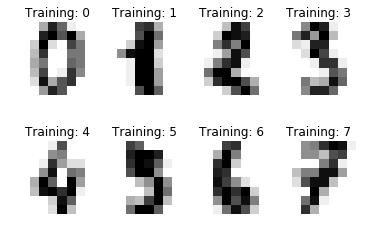

In [19]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()

## Flatten the Images

To apply a classifier on this data, we need to flatten the image, to turn the data in a (samples, feature) matrix:

`DEMO 4.16`

In [20]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

## Model Building

`DEMO 4.17`

In [23]:
# Create a classifier: a support vector classifier
classifier = LogisticRegression()

In [24]:
# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predicting on new data

`DEMO 4.18`

In [25]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

## Model Assessment

`DEMO 4.19`

In [28]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       0.94      0.97      0.96        88
          1       0.86      0.89      0.88        91
          2       0.98      0.98      0.98        86
          3       0.99      0.82      0.90        91
          4       0.99      0.93      0.96        92
          5       0.83      0.90      0.86        91
          6       0.94      0.99      0.96        91
          7       0.98      0.89      0.93        89
          8       0.89      0.88      0.88        88
          9       0.83      0.92      0.87        92

avg / total       0.92      0.92      0.92       899


Confusion matrix:
[[85  0  0  0  1  1  1  0  0  0]
 [ 0 8

In [33]:
print("Accuracy: %s\n" % (metrics.accuracy_score(expected, predicted)))

Accuracy: 0.916573971079



## Visualization

`DEMO 4.20`

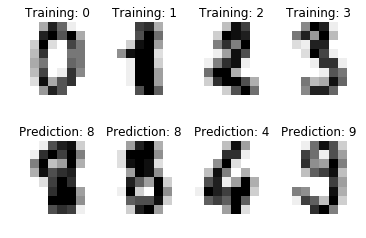

In [10]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()